In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from fluxdataqaqc import Data, QaQc, Plot
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.models.formatters import DatetimeTickFormatter
from bokeh.models import LinearAxis, Range1d
from bokeh.io import output_notebook
output_notebook()

import warnings
warnings.filterwarnings('ignore')

Loading BokehJS ...

In [2]:
station = 'US-UTE'
config_path = f'../station_config/{station}.ini'
d = Data(config_path)
d.df.index.freq = '30min'
df = d.df.rename(columns=d.inv_map)
# get some metadata for saving
site_id = d.site_id
vars_we_want = ['H', 'LE', 'Rn', 'G']
# rename variables, calculate basice statistics table and save to HTML
df[vars_we_want].rename(columns=d.variables).describe().to_html('{}.html'.format(site_id))

q = QaQc(d, daily_frac=3/4, max_interp_hours=4, max_interp_hours_night=6)

# make copies of daily results of different correction options
q.correct_data(meth='ebr', et_gap_fill=True)
ebr_gapfilled = q.df

#q.correct_data(meth='br',et_gap_fill=True)
#br_gapfilled = q.df

q.monthly_df
q.write()

Calculating mean for var: THETA from columns: ['SWC_1_1_1', 'SWC_2_1_1']
Converting vpd from hpa to kpa
Calculating vapor pressure from vapor pressure deficit and air temperature
Calculating dew point temperature from vapor pressure

The input data temporal frequency appears to be less than daily.
Data is being resampled to daily temporal frequency.
Linearly interpolating gaps in energy balance components up to 6 hours when Rn < 0 and up to 4 hours when Rn >= 0.
Filtering days with less then 75.0% or 36/48 sub-daily measurements



Gap filling ET_corr with filtered ETrF x ETr (gridMET)


In [3]:
d.plot(output_type='notebook', plot_width=700)

Shortwave and potential clear sky radiation time series graphs missing all variables
Precipitation time series graphs missing all variables
Evapotranspiration time series graphs missing all variables
Fraction of reference ET time series graphs missing all variables
Energy balance ratio time series graphs missing all variables
Energy balance scatter graphs missing all variables
Latent energy scatter graphs missing all variables
Evapotranspiration scatter graphs missing all variables


Loading BokehJS ...

In [4]:
d.plot(ncols=2, plot_width=500) 

Shortwave and potential clear sky radiation time series graphs missing all variables
Precipitation time series graphs missing all variables
Evapotranspiration time series graphs missing all variables
Fraction of reference ET time series graphs missing all variables
Energy balance ratio time series graphs missing all variables
Energy balance scatter graphs missing all variables
Latent energy scatter graphs missing all variables
Evapotranspiration scatter graphs missing all variables


(0.0, 1.0)

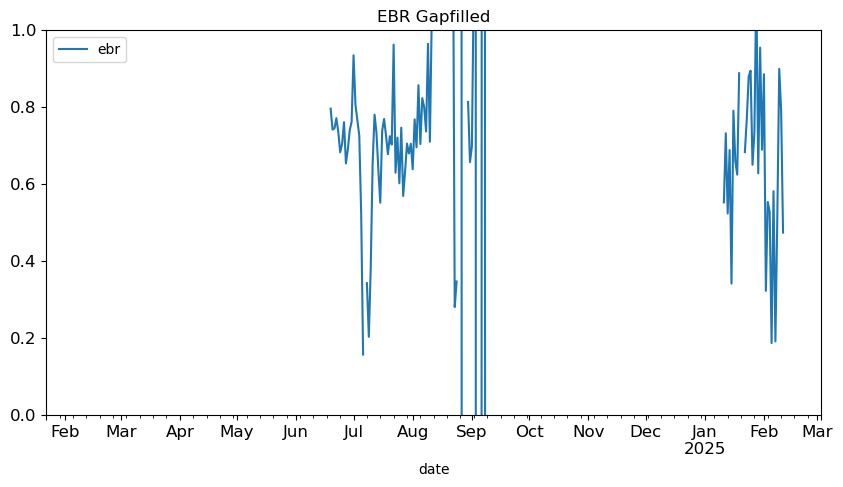

In [11]:
import matplotlib.pyplot as plt

ebr_gapfilled['ebr'].plot(title='EBR Gapfilled', figsize=(10, 5), legend=True, fontsize=12)
plt.ylim(0, 1)

In [5]:
monthly = q.monthly_df

In [6]:
monthly

SWC_1_1_1        WS   RH_1_1_1          WD    input_H        vp  \
date                                                                          
2024-01-31        NaN       NaN        NaN         NaN        NaN       NaN   
2024-02-29        NaN       NaN        NaN         NaN        NaN       NaN   
2024-03-31        NaN       NaN        NaN         NaN        NaN       NaN   
2024-04-30        NaN       NaN        NaN         NaN        NaN       NaN   
2024-05-31        NaN       NaN        NaN         NaN        NaN       NaN   
2024-06-30        NaN       NaN        NaN         NaN        NaN       NaN   
2024-07-31        NaN  2.773822  23.003323  258.968610 -26.548981  0.803499   
2024-08-31        NaN  2.629609  43.158095  246.796493 -19.039720  1.284912   
2024-09-30        NaN  2.656609  32.151465  232.104602 -30.136903  0.784374   
2024-10-31        NaN  2.875118  37.504497  221.056404  -0.234965  0.625231   
2024-11-30        NaN  3.021236  39.446437  251.076790  15.374983  0.297326   
2024-12-31        NaN  2.636044  39.640777  273.161198   9.833809  0.275767   
2025-01-31        NaN  2.780025  23.489692  266.513193  17.453696  0.130610   
2025-02-28        NaN  3.203361  26.353866  263.651867  22.785869  0.251867   
2025-03-31        NaN       NaN        NaN         NaN        NaN       NaN   

                 SW_IN   flux_corr        es        flux  ...  G_subday_gaps  \
date                                                      ...                  
2024-01-31         NaN         NaN       NaN         NaN  ...            NaN   
2024-02-29         NaN         NaN       NaN         NaN  ...         1392.0   
2024-03-31         NaN         NaN       NaN         NaN  ...         1488.0   
2024-04-30         NaN         NaN       NaN         NaN  ...         1440.0   
2024-05-31         NaN         NaN       NaN         NaN  ...         1488.0   
2024-06-30         NaN         NaN       NaN         NaN  ...          850.0   
2024-07-31  334.691539  139.762986  3.388462   97.482243  ...           30.0   
2024-08-31  301.487267  141.942918  2.994560  101.611513  ...          505.0   
2024-09-30  311.337972         NaN  2.422303   87.885380  ...          825.0   
2024-10-31  237.794772         NaN  1.845624   55.285339  ...          187.0   
2024-11-30  192.190394         NaN  0.793625   28.410083  ...          959.0   
2024-12-31  159.781696         NaN  0.737492   13.863780  ...         1488.0   
2025-01-31  175.877374   29.593568  0.560236   19.805002  ...          461.0   
2025-02-28  234.854143         NaN  0.976131   31.129879  ...          619.0   
2025-03-31         NaN         NaN       NaN         NaN  ...            NaN   

            ET_fill_val  H_subday_gaps  gridMET_prcp  LE_subday_gaps  \
date                                                                   
2024-01-31          NaN            NaN           NaN             NaN   
2024-02-29          NaN         1392.0          40.7          1392.0   
2024-03-31          NaN         1488.0          37.6          1488.0   
2024-04-30          NaN         1440.0           8.3          1440.0   
2024-05-31          NaN         1488.0           2.6          1488.0   
2024-06-30          NaN          850.0           6.0           850.0   
2024-07-31          NaN           27.0           7.9            67.0   
2024-08-31          NaN            3.0          75.4            44.0   
2024-09-30          NaN            2.0           5.7            14.0   
2024-10-31   117.056950           21.0          18.0            20.0   
2024-11-30    39.454135            0.0           5.3            44.0   
2024-12-31    14.545916            1.0           0.4           119.0   
2025-01-31          NaN           38.0           0.0           206.0   
2025-02-28          NaN           61.0           6.2            95.0   
2025-03-31          NaN            NaN           NaN             NaN   

            gridMET_ETr     ET_fill  Rn_subday_gaps  gridMET_ETo          ET  
dat